In [1]:
import matplotlib.pyplot as plt
import numpy as np

from priors import prior_transform
from utils import get_q

from spray_gala import *

from spray import generate_stream_spray
from utils import get_track

import time as tt

# Flattened NFW halo
logM, Rs, q = 12.0, 25.0, 1.0
dirx, diry, dirz = 0., 0., 1. #1.0, 1.0, 1.0

# Plummer Sattelite
logm, rs = 8.0, 2.0 

# Initial conditions
x0, y0, z0 = 100.0, 0.0, 0.0     # Position in kpc forward_trajectory[0, :3] #
vx0, vy0, vz0 = 0.0, 200.0, 0.0  # Velocity in kpc/Gyr forward_trajectory[0, 3:6] #

# Integration time
time = 4. # Gyr
alpha = 1.

params = (logM, Rs, q, dirx, diry, dirz, logm, rs, x0, y0, z0, vx0, vy0, vz0, time, alpha)

theta_stream, xv_stream_spray, theta_prog, xv_prog_spray = generate_stream_spray(params,  111)

In [70]:
seed

790142147

Time taken (s):  0.9471611976623535


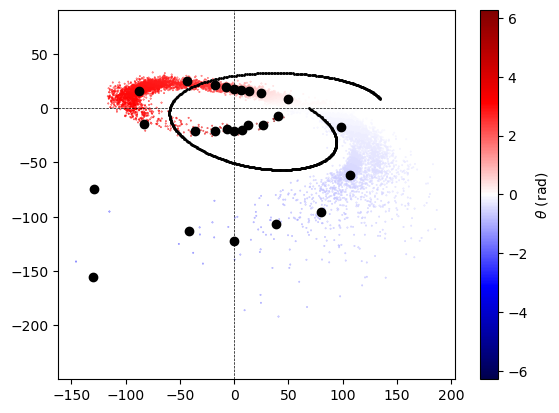

In [13]:
seed = np.random.randint(0, 2**30)
ndim = 14
rng = np.random.default_rng(seed)
p = rng.uniform(0, 1, size=ndim)
logM, Rs, dirx, diry, dirz, logm, rs, x0, z0, vx0, vy0, vz0, time, alpha = prior_transform(p)
alpha=1.0
q = get_q(dirx, diry, dirz)
y0 = 0.0
params = (logM, Rs, q, dirx, diry, dirz, logm, rs, x0, y0, z0, vx0, vy0, vz0, time, alpha)

# xv_stream_gala = model_stream(np.array(params, dtype=np.float64)[:-1], dt=-40)

start = tt.time()
theta_stream, xv_stream_spray, theta_prog, xv_prog_spray = generate_stream_spray(params,  111)
end = tt.time()
print("Time taken (s): ", end-start)

r_stream = np.sqrt(xv_stream_spray[:, 0]**2 + xv_stream_spray[:, 1]**2)
count, theta_bin, r_bin, w_bin = get_track(theta_stream, xv_stream_spray[:, 0], xv_stream_spray[:, 1])
x_bin, y_bin = r_bin * np.cos(theta_bin), r_bin * np.sin(theta_bin)

# plt.scatter(xv_stream_gala[:,0], xv_stream_gala[:,1], s=10)
plt.scatter(xv_stream_spray[:, 0], xv_stream_spray[:, 1], s=0.1, cmap='seismic', c=theta_stream, vmin=-2*np.pi, vmax=2*np.pi)
plt.colorbar(label=r'$\theta$ (rad)')
plt.scatter(xv_prog_spray[:, 0], xv_prog_spray[:, 1], s=1, color='k')
plt.scatter(x_bin, y_bin, color='k')
plt.axis('equal')
plt.axvline(0, color='k', ls='--', lw=0.5)
plt.axhline(0, color='k', ls='--', lw=0.5)

/var/folders/bz/ftchh2fx1mzg7zrsqk32mjp40000gn/T/ipykernel_91698/1918078826.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(theta_stream, r_stream, s=0.1, cmap='seismic')#, c=theta_stream, vmin=-2*np.pi, vmax=2*np.pi)


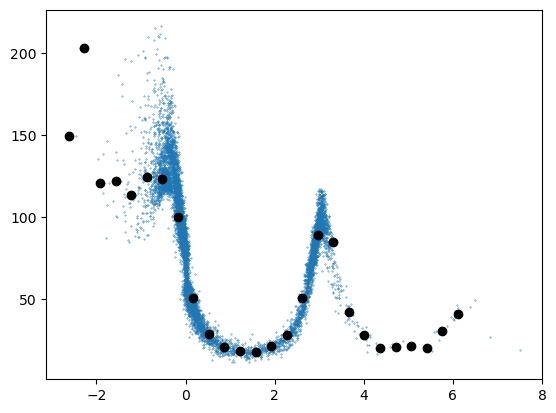

In [14]:
plt.scatter(theta_stream, r_stream, s=0.1, cmap='seismic')#, c=theta_stream, vmin=-2*np.pi, vmax=2*np.pi)
plt.scatter(theta_bin, r_bin, color='k')

In [42]:
xv_prog_spray[:, 0].min(), xv_prog_spray[:, 1].min()

(Array(-128.7103, dtype=float32), Array(-37.76767, dtype=float32))

(-105.23884773254395,
 407.0099582672119,
 -153.00875415802003,
 54.45434513092041)

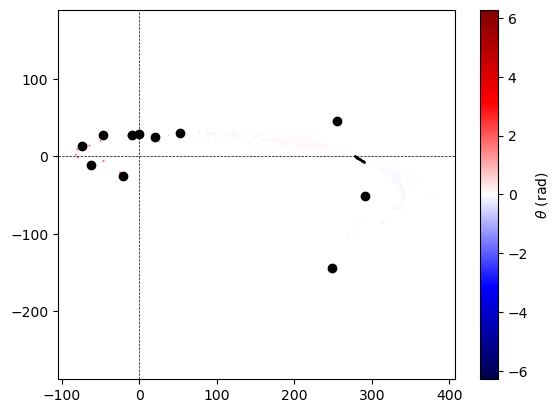

In [69]:
plt.scatter(xv_stream_spray[:, 0], xv_stream_spray[:, 1], s=0.1, cmap='seismic', c=theta_stream, vmin=-2*np.pi, vmax=2*np.pi)
plt.colorbar(label=r'$\theta$ (rad)')
plt.scatter(xv_prog_spray[-10:, 0], xv_prog_spray[-10:, 1], s=1, color='k')
plt.scatter(x_bin, y_bin, color='k')
plt.axvline(0, color='k', ls='--', lw=0.5)
plt.axhline(0, color='k', ls='--', lw=0.5)
plt.axis('equal')


### Gala Spray

In [8]:
from spray_gala import *
xv_stream_gala = model_stream(np.array(params, dtype=np.float64)[:-1], dt=-0.1)

In [16]:
from spray import generate_stream_spray
from utils import get_track

theta_stream, xv_stream_spray = generate_stream_spray(params,  111)
count, theta_bin, r_bin, w_bin = get_track(theta_stream, xv_stream_spray[:, 0], xv_stream_spray[:, 1])
x_bin, y_bin = r_bin * np.cos(theta_bin), r_bin * np.sin(theta_bin)

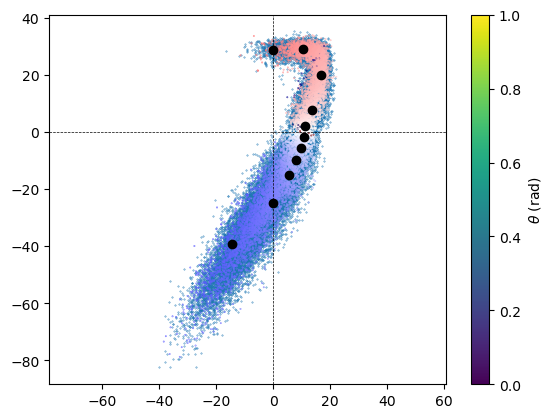

In [ ]:
import numpy as np

plt.scatter(xv_stream_gala[:,0], xv_stream_gala[:,1], s=0.1)
plt.scatter(xv_stream_spray[:, 0], xv_stream_spray[:, 1], s=0.1, cmap='seismic', c=theta_stream, vmin=-2*np.pi, vmax=2*np.pi)
plt.scatter(x_bin[count>100], y_bin[count>100], color='k')
plt.colorbar(label=r'$\theta$ (rad)')
plt.axis('equal')
plt.axvline(0, color='k', ls='--', lw=0.5)
plt.axhline(0, color='k', ls='--', lw=0.5)


In [31]:
from constants import KMS_TO_KPCGYR, KPCGYR_TO_KMS
import jax
from utils import jax_unwrap, get_rj_vj_R
from spray import *
tail = 0
seed = 111

logM, Rs, q, dirx, diry, dirz, logm, rs, x0, y0, z0, vx0, vy0, vz0, time, alpha = params
vx0 *= KMS_TO_KPCGYR
vy0 *= KMS_TO_KPCGYR
vz0 *= KMS_TO_KPCGYR

backward_trajectory = integrate_satellite(x0, y0, z0, vx0, vy0, vz0, logM, Rs, q, dirx, diry, dirz, -time)

forward_trajectory  = integrate_satellite(*backward_trajectory[-1, :], logM, Rs, q, dirx, diry, dirz, time*alpha)

theta_sat_forward = jnp.arctan2(forward_trajectory[:, 1], forward_trajectory[:, 0])
theta_sat_forward = jnp.where(theta_sat_forward < 0, theta_sat_forward + 2 * jnp.pi, theta_sat_forward)
theta_sat_forward = jax_unwrap(theta_sat_forward)

hessians  = jax.vmap(NFWHessian, in_axes=(0, 0, 0, None, None, None, None, None, None)) \
                    (forward_trajectory[:, 0], forward_trajectory[:, 1], forward_trajectory[:, 2], logM, Rs, q, dirx, diry, dirz)
rj, vj, R = get_rj_vj_R(hessians, forward_trajectory, 10 ** logm)
ic_particle_spray = create_ic_particle_spray(forward_trajectory, rj, vj, R, tail, seed)

index = jnp.repeat(jnp.arange(0, N_STEPS, 1), N_PARTICLES // N_STEPS)
theta_stream , xv_stream = jax.vmap(integrate_stream_spray, in_axes=(0, 0, 0, 0, 0, 0, 0, None, None, None, None, None, None, None, None, None, None, None)) \
    (index, ic_particle_spray[:, 0], ic_particle_spray[:, 1], ic_particle_spray[:, 2], ic_particle_spray[:, 3], ic_particle_spray[:, 4], ic_particle_spray[:, 5],
    theta_sat_forward, forward_trajectory, logM, Rs, q, dirx, diry, dirz, logm, rs, time*alpha)

xv_stream *= jnp.array([1, 1, 1, KPCGYR_TO_KMS, KPCGYR_TO_KMS, KPCGYR_TO_KMS])  # Convert velocities back to km/s

(-149.63347702026368,
 254.17258529663087,
 -11.591702461242676,
 26.825486183166504)

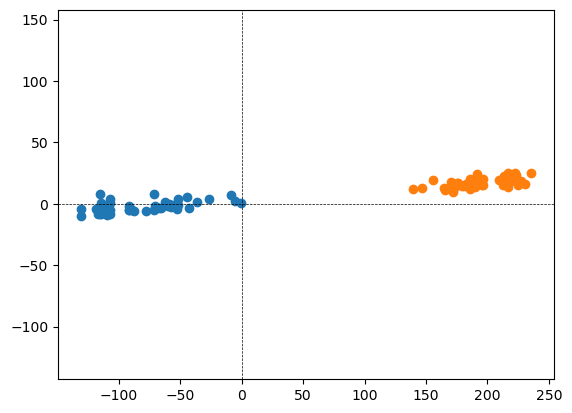

In [34]:
arg_wrong = np.where(theta_stream<-np.pi)
plt.scatter(ic_particle_spray[arg_wrong, 0], ic_particle_spray[arg_wrong, 1])
plt.scatter(xv_stream[arg_wrong, 0], xv_stream[arg_wrong, 1])
plt.axhline(0, color='k', ls='--', lw=0.5)
plt.axvline(0, color='k', ls='--', lw=0.5)
plt.axis('equal')

In [12]:
arg_wrong

(array([  73,  215,  249,  397,  627,  819,  827,  835,  945, 1035, 1087,
        1517, 1627, 1663, 2039, 2303, 2351, 2375, 3267, 3321, 3841]),)

In [10]:
theta_raw[1].shape

(10000,)

In [10]:
theta_stream[arg_wrong][0], theta_raw[arg_wrong][0], theta_count[arg_wrong][0]

(Array(-3.508674, dtype=float32),
 Array(2.7745116, dtype=float32),
 Array(0., dtype=float32))

In [ ]:
theta_raw[arg_wrong][2] - theta_sat_forward[0]

Array(-3.096701, dtype=float32)

In [16]:
thetap = theta_sat_forward[-1]

theta0 = jnp.arctan2(ic_particle_spray[arg_wrong][0][1], ic_particle_spray[arg_wrong][0][0])
theta0 = jax.lax.cond(theta0 < 0, lambda x: x + 2 * jnp.pi, lambda x: x, theta0)

In [19]:
jnp.floor_divide(thetap - (thetap//(2*np.pi) - theta0//(2*np.pi)), 2*np.pi)

Array(0., dtype=float32)

In [10]:
theta_raw[arg_wrong], theta_stream[arg_wrong]

(Array([6.285533 , 6.2844696, 6.2874804, 6.283928 , 6.287011 , 6.285056 ,
        6.287388 , 6.2854853, 6.284958 , 6.284575 , 6.283939 , 6.286133 ,
        6.286751 , 6.2848287, 6.287241 , 6.2867956, 6.2845163, 6.284363 ,
        6.287257 , 6.2836037, 6.2833138, 6.2847047, 6.287315 ],      dtype=float32),
 Array([6.285533 , 6.2844696, 6.2874804, 6.283928 , 6.287011 , 6.285056 ,
        6.287388 , 6.2854853, 6.284958 , 6.284575 , 6.283939 , 6.286133 ,
        6.286751 , 6.2848287, 6.287241 , 6.2867956, 6.2845163, 6.284363 ,
        6.287257 , 6.2836037, 6.2833138, 6.2847047, 6.287315 ],      dtype=float32))

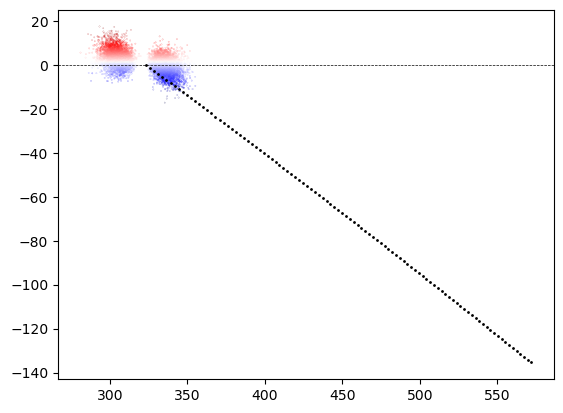

In [8]:
# plt.scatter(xv_stream_gala[:,0], xv_stream_gala[:,1], s=0.1)

# plt.scatter(xv_stream[:, 0], xv_stream[:, 1], s=0.1, cmap='seismic', c=theta_stream, vmin=-2*np.pi, vmax=2*np.pi)
plt.scatter(xv_stream[:, 0], xv_stream[:, 1], s=0.01, cmap='seismic', c=theta_stream)#, vmin=-2*np.pi, vmax=2*np.pi)
plt.scatter(forward_trajectory[:,0], forward_trajectory[:,1], s=1, color='k')
plt.axhline(0, color='k', ls='--', lw=0.5)

In [6]:
from spray import *
from constants import *
tail = 0
seed = 111
logM, Rs, q, dirx, diry, dirz, logm, rs, x0, y0, z0, vx0, vy0, vz0, time, alpha = params

backward_trajectory = integrate_satellite(x0, y0, z0, vx0*GYR_TO_S/KPC_TO_KM, vy0*GYR_TO_S/KPC_TO_KM, vz0*GYR_TO_S/KPC_TO_KM, logM, Rs, q, dirx, diry, dirz, -time)

forward_trajectory  = integrate_satellite(*backward_trajectory[-1, :], logM, Rs, q, dirx, diry, dirz, time*alpha)

theta_sat_forward = jnp.arctan2(forward_trajectory[:, 1], forward_trajectory[:, 0])
theta_sat_forward = jnp.where(theta_sat_forward < 0, theta_sat_forward + 2 * jnp.pi, theta_sat_forward)
theta_sat_forward = jax_unwrap(theta_sat_forward)

hessians  = jax.vmap(NFWHessian, in_axes=(0, 0, 0, None, None, None, None, None, None)) \
                    (forward_trajectory[:, 0], forward_trajectory[:, 1], forward_trajectory[:, 2], logM, Rs, q, dirx, diry, dirz)
@jax.jit
def get_rj_vj_R(hessians, orbit_sat, mass_sat):
    x, y, z, vx, vy, vz = orbit_sat.T

    # Compute angular momentum L
    Lx = y * vz - z * vy
    Ly = z * vx - x * vz
    Lz = x * vy - y * vx
    r = jnp.sqrt(x**2 + y**2 + z**2)  # Regularization to prevent NaN
    L = jnp.sqrt(Lx**2 + Ly**2 + Lz**2)

    # Rotation matrix (transform from host to satellite frame)
    R = jnp.stack([
        jnp.stack([x / r, y / r, z / r], axis=-1),
        jnp.stack([
            (y / r) * (Lz / L) - (z / r) * (Ly / L),
            (z / r) * (Lx / L) - (x / r) * (Lz / L),
            (x / r) * (Ly / L) - (y / r) * (Lx / L)
        ], axis=-1),
        jnp.stack([Lx / L, Ly / L, Lz / L], axis=-1),
    ], axis=-2)  # Shape: (N, 3, 3)

    # Compute second derivative of potential
    d2Phi_dr2 = (
        x**2 * hessians[:, 0, 0] + y**2 * hessians[:, 1, 1] + z**2 * hessians[:, 2, 2] +
        2 * x * y * hessians[:, 0, 1] + 2 * y * z * hessians[:, 1, 2] + 2 * z * x * hessians[:, 0, 2]
    ) / r**2 # 1 / Gyr²

    # Compute Jacobi radius and velocity offset
    Omega = L / r**2  # 1 / Gyr
    rj = ((mass_sat * G / (Omega**2 - d2Phi_dr2))) ** (1. / 3)  # kpc
    vj = Omega * rj

    return rj, vj, R
rj, vj, R = get_rj_vj_R(hessians, forward_trajectory, 10 ** logm)

# ic_particle_spray = create_ic_particle_spray(forward_trajectory, rj, vj, R, tail, seed)
ic_particle_spray = jnp.array(np.load('ic_stream.npy'))

index = jnp.repeat(jnp.arange(0, N_STEPS, 1), N_PARTICLES // N_STEPS)
theta_stream , xv_stream = jax.vmap(integrate_stream_spray, in_axes=(0, 0, 0, 0, 0, 0, 0, None, None, None, None, None, None, None, None, None, None, None)) \
    (index, ic_particle_spray[:, 0], ic_particle_spray[:, 1], ic_particle_spray[:, 2], ic_particle_spray[:, 3], ic_particle_spray[:, 4], ic_particle_spray[:, 5],
    theta_sat_forward, forward_trajectory, logM, Rs, q, dirx, diry, dirz, logm, rs, time)

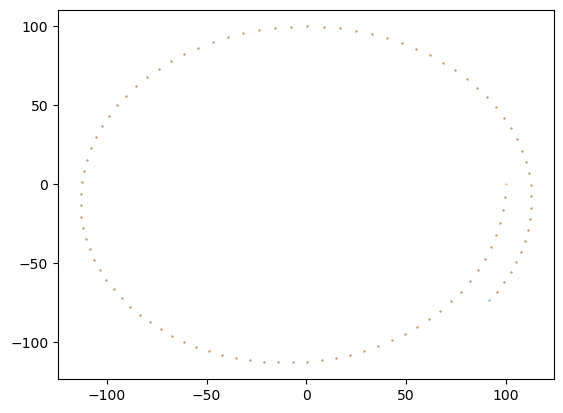

In [7]:
plt.scatter(backward_trajectory[:,0], backward_trajectory[:,1], s=0.1)
plt.scatter(forward_trajectory[:,0], forward_trajectory[:,1], s=0.1)

In [32]:

units = [auni.kpc, auni.km / auni.s, auni.Msun, auni.Gyr, auni.rad]

w0 = gd.PhaseSpacePosition(
    pos=np.array([x0, y0, z0], dtype=np.float64) * auni.kpc,
    vel=np.array([vx0, vy0, vz0], dtype=np.float64) * auni.km / auni.s,
)

mat = get_mat(dirx, diry, dirz)
mat = np.array(mat, dtype=np.float64)

pot = gp.NFWPotential(10**logM, Rs, 1., 1., q, R=mat, units=units)

from gala.integrate import LeapfrogIntegrator
gala_orbit = pot.integrate_orbit(w0, n_steps=5000, dt=-4./5000, Integrator=LeapfrogIntegrator)

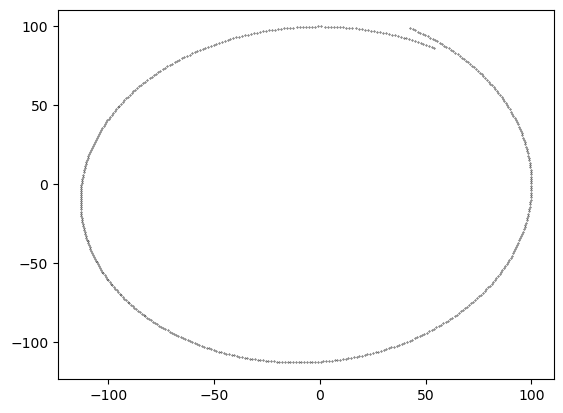

In [37]:
# plt.scatter(gala_orbit.x, gala_orbit.y, s=1, c='r')
plt.scatter(forward_trajectory[:,0], forward_trajectory[:,1], s=.1, c='k')

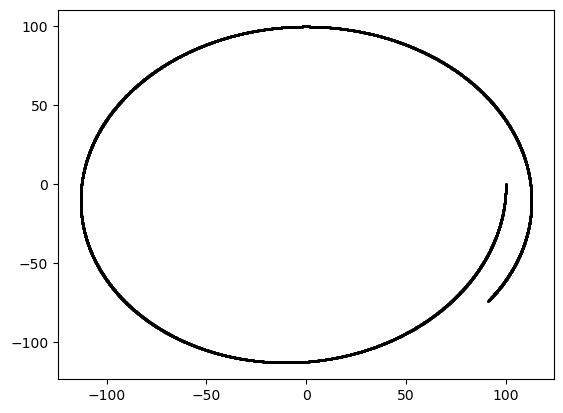

In [13]:
plt.scatter(forward_trajectory[:,0], forward_trajectory[:,1], s=1, c='k')

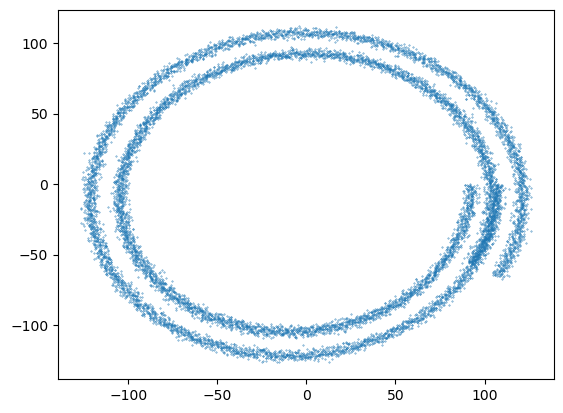

In [18]:
plt.scatter(ic_particle_spray[:, 0], ic_particle_spray[:, 1], s=0.1)

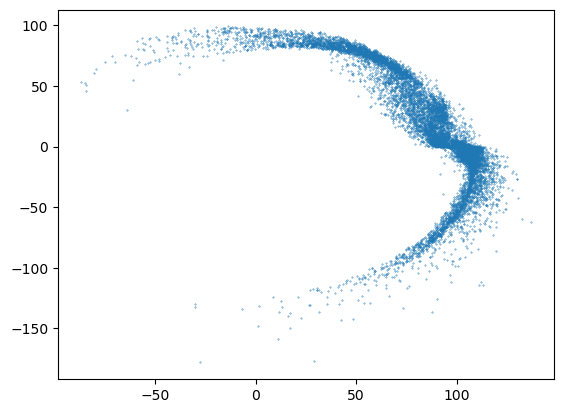

In [19]:
plt.scatter(xv_stream[:,0], xv_stream[:,1], s=0.1)